# Assignment - Weather and Citipy
Here, the flow is to find unique latitude and longitude coordinates. Then from Citipy, unique city names are identified.
For the list of Cities on weather api, key attitubute (temprature, humidity, wind speed and cloudiness) values are fetched.
I also have a scatter plot to show a range of coordinates across multiple locations.

Limitation: 
1. Some City names on Citipy dont exist on Weather app. To handle this, I am fetching 575 city names from which I will drop the cities not on weather app. Hence, I will have a little more than 500 city names in the list.
2. Inspite of restricting the duplicate city names, there are still a few. I have introduced a function later to delete duplicate cities.   

In [19]:
# Import all Dependencies
import random
import requests
import pandas as pd
import time
from time import strftime, gmtime
import openweathermapy.core as owm
import matplotlib.pyplot as plt
from config import api_key
from citipy import citipy
import numpy as np
import csv
from PIL import Image

To Find the unique cities by latitude, longitude and different distances fro the equator
    - generate a random float between -180 and 180 as the latitude(equator) coordinate not in the list
    - generate a random float between -90 and -90 as the longitude coordinate (duplicates are ok as the latitude is unique)
    - find key attitubes for the city list from weather app

In [20]:
cityname1 = {"Latitude":[],"Longitude":[],"City":[],"Temperature":[],"Humidity":[],"Cloudiness":[],"Wind Speed":[]}
citycoordinates = []
lat1 =[]

while (len(citycoordinates)<=575):
    tempLat = random.uniform(-180,180)
    if tempLat not in lat1:
        lat1.append(tempLat)
        tempLon = random.uniform(-90,90)
    else:
        pass
    tempcity = citipy.nearest_city(tempLat, tempLon)
    if tempcity not in citycoordinates:
        citycoordinates.append(tempcity)
        name = tempcity.city_name
        cityname1["City"].append(name)
        cityname1["Latitude"].append(tempLat)
        cityname1["Longitude"].append(tempLon)
    else:
        pass

For the city list, get key attirute value from weathermap
    - included a start and close time to check runtime
    - for cities not found on weather map, pass blank values to be handled later

In [21]:
start_time = time.time()
index = 1
for city in cityname1["City"]:
    url = "http://api.openweathermap.org/data/2.5/weather?&q="
    query_url = url + city + "&units=imperial&appid=" + api_key
    response = requests.get(query_url).json()
    status_code = response['cod']
    
    if status_code == 200:
        cityname1["Temperature"].append(response['main']['temp'])
        cityname1["Humidity"].append(response['main']['humidity'])
        cityname1["Cloudiness"].append(response['clouds']['all'])
        cityname1["Wind Speed"].append(response['wind']['speed'])
        print(index, "City count , City Id: ", response["id"])
        print("City Name: " , response["name"])
        print(query_url)
        index += 1
        time.sleep(1)
    else:
        cityname1["Temperature"].append("")
        cityname1["Humidity"].append("")
        cityname1["Cloudiness"].append("")
        cityname1["Wind Speed"].append("")
print("--- %s seconds ---" % (time.time() - start_time))

1 City count , City Id:  1507390
City Name:  Dikson
http://api.openweathermap.org/data/2.5/weather?&q=dikson&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
2 City count , City Id:  2729907
City Name:  Longyearbyen
http://api.openweathermap.org/data/2.5/weather?&q=longyearbyen&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
3 City count , City Id:  3833367
City Name:  Ushuaia
http://api.openweathermap.org/data/2.5/weather?&q=ushuaia&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
4 City count , City Id:  3471451
City Name:  Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?&q=arraial do cabo&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
5 City count , City Id:  3369157
City Name:  Cape Town
http://api.openweathermap.org/data/2.5/weather?&q=cape town&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
6 City count , City Id:  3831208
City Name:  Qaanaaq
http://api.openweathermap.org/data/2.5/weather?&q=qaanaaq&units=imperial&appid=9c4bb9576cd4193

50 City count , City Id:  2069194
City Name:  Jamestown
http://api.openweathermap.org/data/2.5/weather?&q=jamestown&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
51 City count , City Id:  1486321
City Name:  Yar-Sale
http://api.openweathermap.org/data/2.5/weather?&q=yar-sale&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
52 City count , City Id:  535839
City Name:  Leshukonskoye
http://api.openweathermap.org/data/2.5/weather?&q=leshukonskoye&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
53 City count , City Id:  3396048
City Name:  Macaiba
http://api.openweathermap.org/data/2.5/weather?&q=macaiba&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
54 City count , City Id:  1489853
City Name:  Tazovskiy
http://api.openweathermap.org/data/2.5/weather?&q=tazovskiy&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
55 City count , City Id:  1642773
City Name:  Japura
http://api.openweathermap.org/data/2.5/weather?&q=japura&units=imperial&appid=9c4bb9576cd41932b3

99 City count , City Id:  6945992
City Name:  Betsiamites
http://api.openweathermap.org/data/2.5/weather?&q=betsiamites&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
100 City count , City Id:  3393692
City Name:  Itarema
http://api.openweathermap.org/data/2.5/weather?&q=itarema&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
101 City count , City Id:  3359638
City Name:  Walvis Bay
http://api.openweathermap.org/data/2.5/weather?&q=walvis bay&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
102 City count , City Id:  2516507
City Name:  Huescar
http://api.openweathermap.org/data/2.5/weather?&q=huescar&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
103 City count , City Id:  2408154
City Name:  Kamakwie
http://api.openweathermap.org/data/2.5/weather?&q=kamakwie&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
104 City count , City Id:  3354077
City Name:  Opuwo
http://api.openweathermap.org/data/2.5/weather?&q=opuwo&units=imperial&appid=9c4bb9576cd41932b37e

148 City count , City Id:  199604
City Name:  Chepareria
http://api.openweathermap.org/data/2.5/weather?&q=chepareria&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
149 City count , City Id:  1701054
City Name:  Marawi
http://api.openweathermap.org/data/2.5/weather?&q=marawi&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
150 City count , City Id:  3893629
City Name:  Coquimbo
http://api.openweathermap.org/data/2.5/weather?&q=coquimbo&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
151 City count , City Id:  3386213
City Name:  Touros
http://api.openweathermap.org/data/2.5/weather?&q=touros&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
152 City count , City Id:  3665199
City Name:  Ariquemes
http://api.openweathermap.org/data/2.5/weather?&q=ariquemes&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
153 City count , City Id:  2214846
City Name:  Misratah
http://api.openweathermap.org/data/2.5/weather?&q=misratah&units=imperial&appid=9c4bb9576cd41932b37e7e

197 City count , City Id:  3416888
City Name:  Grindavik
http://api.openweathermap.org/data/2.5/weather?&q=grindavik&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
198 City count , City Id:  1684803
City Name:  Tabuk
http://api.openweathermap.org/data/2.5/weather?&q=tabuk&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
199 City count , City Id:  3944399
City Name:  Chancay
http://api.openweathermap.org/data/2.5/weather?&q=chancay&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
200 City count , City Id:  3408064
City Name:  Remanso
http://api.openweathermap.org/data/2.5/weather?&q=remanso&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
201 City count , City Id:  2685750
City Name:  Ostersund
http://api.openweathermap.org/data/2.5/weather?&q=ostersund&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
202 City count , City Id:  1798292
City Name:  Tuzha
http://api.openweathermap.org/data/2.5/weather?&q=tuzha&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c775

246 City count , City Id:  3194183
City Name:  Ogulin
http://api.openweathermap.org/data/2.5/weather?&q=ogulin&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
247 City count , City Id:  4372777
City Name:  Vardo
http://api.openweathermap.org/data/2.5/weather?&q=vardo&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
248 City count , City Id:  3394500
City Name:  Morada Nova
http://api.openweathermap.org/data/2.5/weather?&q=morada nova&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
249 City count , City Id:  471308
City Name:  Voyvozh
http://api.openweathermap.org/data/2.5/weather?&q=voyvozh&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
250 City count , City Id:  1733782
City Name:  Victoria
http://api.openweathermap.org/data/2.5/weather?&q=victoria&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
251 City count , City Id:  1524298
City Name:  Aksu
http://api.openweathermap.org/data/2.5/weather?&q=aksu&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
2

295 City count , City Id:  749780
City Name:  Canakkale
http://api.openweathermap.org/data/2.5/weather?&q=canakkale&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
296 City count , City Id:  3448903
City Name:  Sao Joao da Barra
http://api.openweathermap.org/data/2.5/weather?&q=sao joao da barra&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
297 City count , City Id:  57000
City Name:  Hobyo
http://api.openweathermap.org/data/2.5/weather?&q=hobyo&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
298 City count , City Id:  6078372
City Name:  Moose Factory
http://api.openweathermap.org/data/2.5/weather?&q=moose factory&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
299 City count , City Id:  3379316
City Name:  Lethem
http://api.openweathermap.org/data/2.5/weather?&q=lethem&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
300 City count , City Id:  556268
City Name:  Ostrovnoy
http://api.openweathermap.org/data/2.5/weather?&q=ostrovnoy&units=imperial&appid=9

344 City count , City Id:  110690
City Name:  Faya
http://api.openweathermap.org/data/2.5/weather?&q=faya&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
345 City count , City Id:  3305808
City Name:  Warmbad
http://api.openweathermap.org/data/2.5/weather?&q=warmbad&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
346 City count , City Id:  1513990
City Name:  Gazli
http://api.openweathermap.org/data/2.5/weather?&q=gazli&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
347 City count , City Id:  364933
City Name:  Umm Kaddadah
http://api.openweathermap.org/data/2.5/weather?&q=umm kaddadah&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
348 City count , City Id:  506763
City Name:  Polyarnyy
http://api.openweathermap.org/data/2.5/weather?&q=polyarnyy&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
349 City count , City Id:  1261853
City Name:  Narasannapeta
http://api.openweathermap.org/data/2.5/weather?&q=narasannapeta&units=imperial&appid=9c4bb9576cd41932b3

393 City count , City Id:  1052944
City Name:  Angoche
http://api.openweathermap.org/data/2.5/weather?&q=angoche&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
394 City count , City Id:  3144987
City Name:  Beisfjord
http://api.openweathermap.org/data/2.5/weather?&q=beisfjord&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
395 City count , City Id:  5977046
City Name:  Hornepayne
http://api.openweathermap.org/data/2.5/weather?&q=hornepayne&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
396 City count , City Id:  2641676
City Name:  Hermon
http://api.openweathermap.org/data/2.5/weather?&q=hermon&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
397 City count , City Id:  726050
City Name:  Varna
http://api.openweathermap.org/data/2.5/weather?&q=varna&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
398 City count , City Id:  1337613
City Name:  Kulhudhuffushi
http://api.openweathermap.org/data/2.5/weather?&q=kulhudhuffushi&units=imperial&appid=9c4bb9576cd419

442 City count , City Id:  3393471
City Name:  Oriximina
http://api.openweathermap.org/data/2.5/weather?&q=oriximina&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
443 City count , City Id:  889191
City Name:  Karoi
http://api.openweathermap.org/data/2.5/weather?&q=karoi&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
444 City count , City Id:  3670199
City Name:  San Antero
http://api.openweathermap.org/data/2.5/weather?&q=san antero&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
445 City count , City Id:  3464724
City Name:  Diamantino
http://api.openweathermap.org/data/2.5/weather?&q=diamantino&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
446 City count , City Id:  302043
City Name:  Salihli
http://api.openweathermap.org/data/2.5/weather?&q=salihli&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
447 City count , City Id:  3576994
City Name:  Cockburn Town
http://api.openweathermap.org/data/2.5/weather?&q=cockburn town&units=imperial&appid=9c4bb9576

491 City count , City Id:  215597
City Name:  Lubana
http://api.openweathermap.org/data/2.5/weather?&q=lubana&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
492 City count , City Id:  6067472
City Name:  Marystown
http://api.openweathermap.org/data/2.5/weather?&q=marystown&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
493 City count , City Id:  4994325
City Name:  Grand Haven
http://api.openweathermap.org/data/2.5/weather?&q=grand haven&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
494 City count , City Id:  1223738
City Name:  Weligama
http://api.openweathermap.org/data/2.5/weather?&q=weligama&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
495 City count , City Id:  933685
City Name:  Kanye
http://api.openweathermap.org/data/2.5/weather?&q=kanye&units=imperial&appid=9c4bb9576cd41932b37e7ede0d5c7753
496 City count , City Id:  3464547
City Name:  Dom Pedrito
http://api.openweathermap.org/data/2.5/weather?&q=dom pedrito&units=imperial&appid=9c4bb9576cd41932b

In [22]:
# Convert list to DataFrame and included a count check for number of values

cityname1 = pd.DataFrame(cityname1)
len(cityname1)

576

In [23]:
# For cities not found on weatherapp, replace blank with NaN an then delete these rows. Included a count check for number of cities

cityname1['Cloudiness'].replace('', np.nan, inplace=True)
cityname1.dropna(subset=['Cloudiness'], inplace=True)
len(cityname1)

515

In [24]:
# Dropping duplicate city names and included a count check for number of cities

cityname1 = cityname1.drop_duplicates(["City"])
len(cityname1)

508

In [25]:
# Convert wind speed rendered as mps to mph
# Save dataframe to CSV file

# cityname1["Wind Speed"] = cityname1["Wind Speed"] *60
cityname1.to_csv('Results.csv', sep=',', encoding='utf-8',index=False)

In [26]:
# get current time to add to graph titles

CurDate = strftime("%d %b %Y", gmtime())
CurDate

'31 May 2018'

In the scatter plot below, the temperature vs Latitude is depicted to check the spread.
## Conclusion: Since it is summer, the temperature is warmer for majority of cities close to the equator

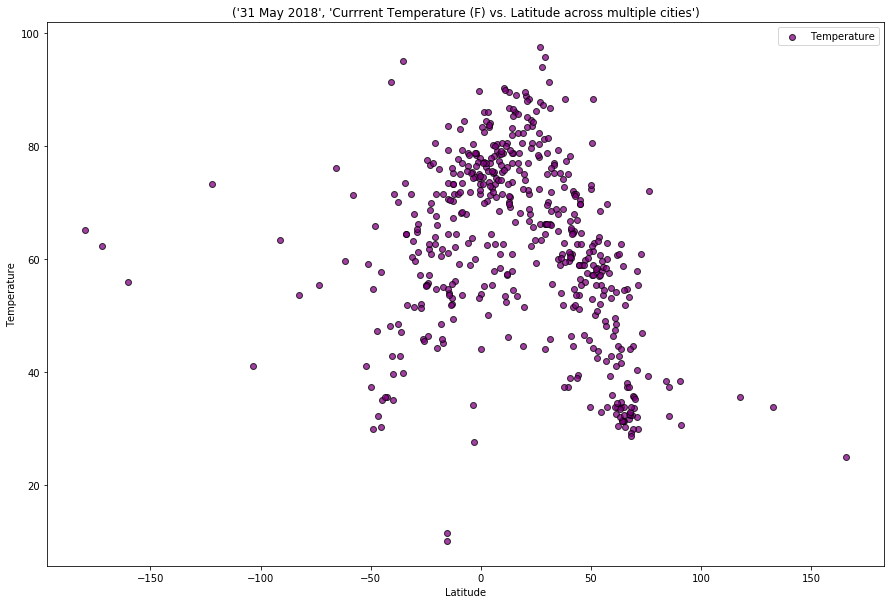

In [31]:
# Plot scatter plot with Temperature (F) vs. Latitude and save as .png

plt.figure(figsize=(15,10))
plt.scatter(cityname1["Latitude"], cityname1["Temperature"], marker="o", facecolors="purple", edgecolors="black",
    alpha=0.75)
plt.legend()
templatChartTitle = CurDate, "Currrent Temperature (F) vs. Latitude across multiple cities"

# Included a horizontal line at y = 0 to depict Equator

# plt.axvline(y=0, color='r', linestyle='-')
plt.title(templatChartTitle)
plt.ylabel("Temperature")
plt.xlabel("Latitude")

plt.savefig('TempLatChartTitle.png')

In the scatter plot below, the humidity vs Latitude is depicted to check the spread.

## Conclusion: Since it is summer, the humidity is high for majority of the cities

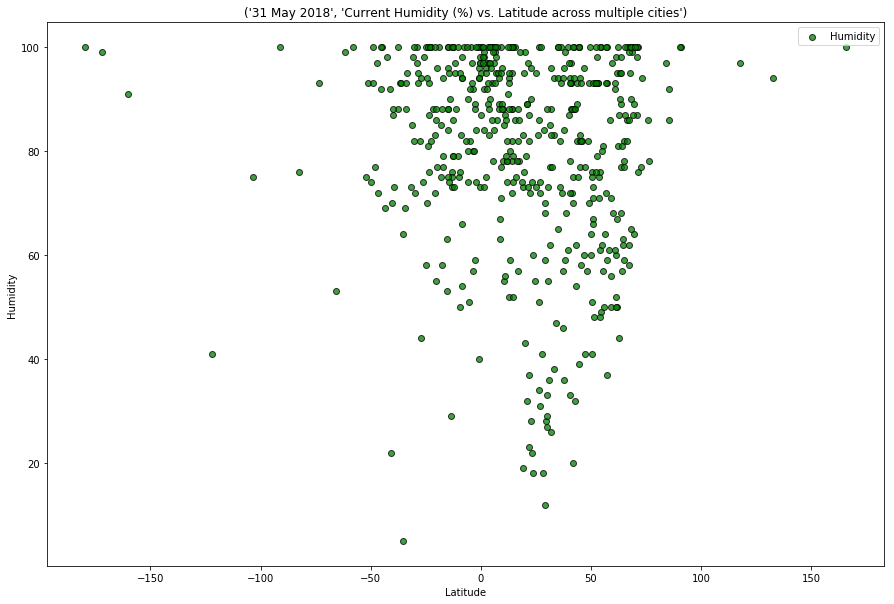

In [32]:
# Plot scatter plot with Humidity (%) vs. Latitude and save as .png

plt.figure(figsize=(15,10))
plt.scatter(cityname1["Latitude"], cityname1["Humidity"], marker="o", facecolors="green", edgecolors="black",
            alpha=0.75)
plt.legend()
# plt.axvline(y=0, color='r', linestyle='-')
HumLatChartTitle = CurDate, "Current Humidity (%) vs. Latitude across multiple cities"
plt.title(HumLatChartTitle)
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig('HumLatChartTitle.png')

In the scatter plot below, the cloudiness vs Latitude is depicted to check the spread.

## Conclusion: There is no pattern in the spread of clouds

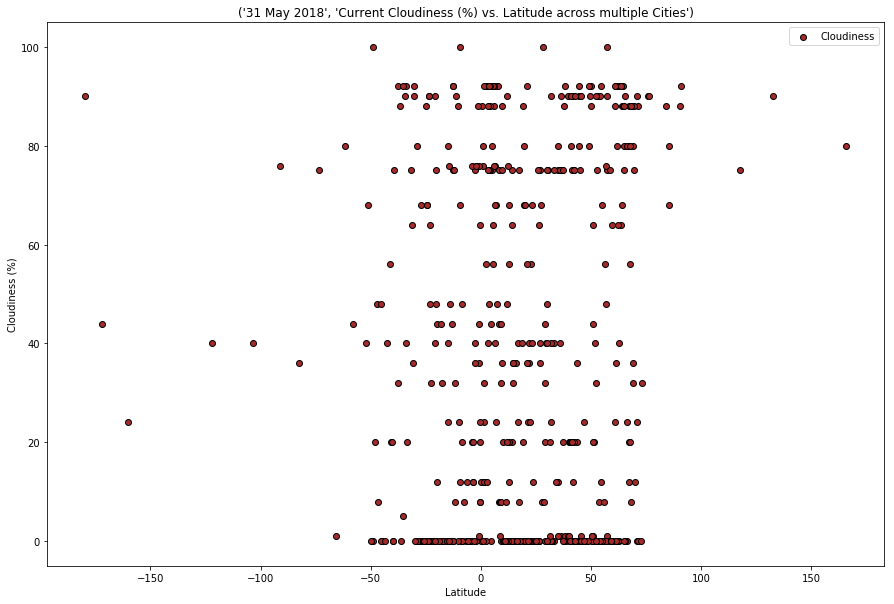

In [33]:
# Plot scatter plot with Cloudiness (%) vs. Latitude and save as .png

plt.figure(figsize=(15,10))
plt.scatter(cityname1["Latitude"], cityname1["Cloudiness"], marker="o", facecolors="brown", edgecolors="black",
            alpha=1)
plt.legend()
# plt.axvline(y=0, color='r', linestyle='-')
ClouLatChartTitle = CurDate, "Current Cloudiness (%) vs. Latitude across multiple Cities"
plt.title(ClouLatChartTitle)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig('ClouLatChartTitle.png')

In the scatter plot below, the wind speed vs latitude is depicted to check the spread.

## Conclusion: The wind spead  is on the lower limit for majority of the cities

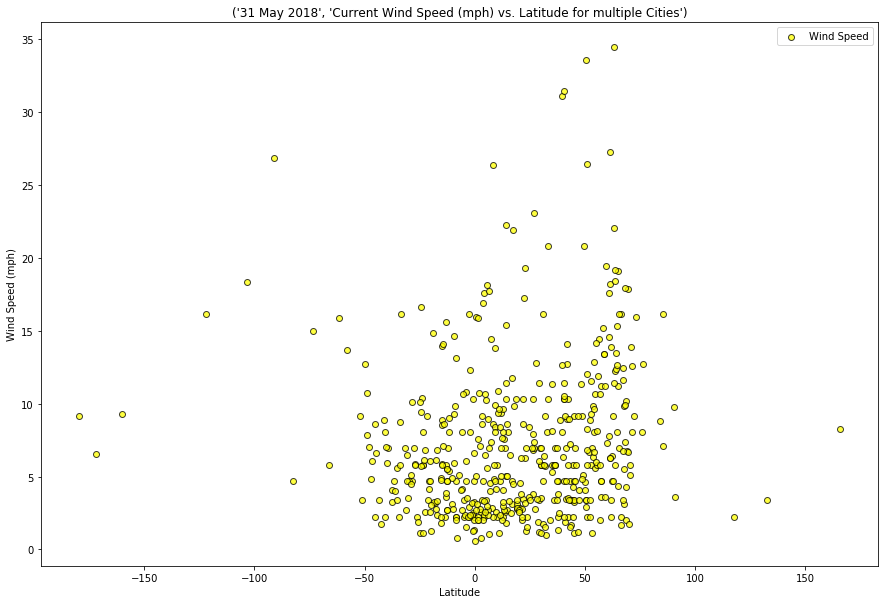

In [35]:
# Plot scatter plot with Wind Speed (mph) vs. Latitude and save as .png

plt.figure(figsize=(15,10))
plt.scatter(cityname1["Latitude"], cityname1["Wind Speed"], marker="o", facecolors="yellow", edgecolors="black",
            alpha=0.75)
plt.legend()
# plt.axvline(y=0, color='r', linestyle='-')
WindLatChartTitle = CurDate, "Current Wind Speed (mph) vs. Latitude for multiple Cities"
plt.title(WindLatChartTitle)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig('WindLatChartTitle.png')

In the scatter plot below, the Latitude  vs Longitude is depicted to check the spread. The horizontal line in this graph depicts the Meridian

## Observation: The random function concentrates values between -50 and 50 degress along the equator 

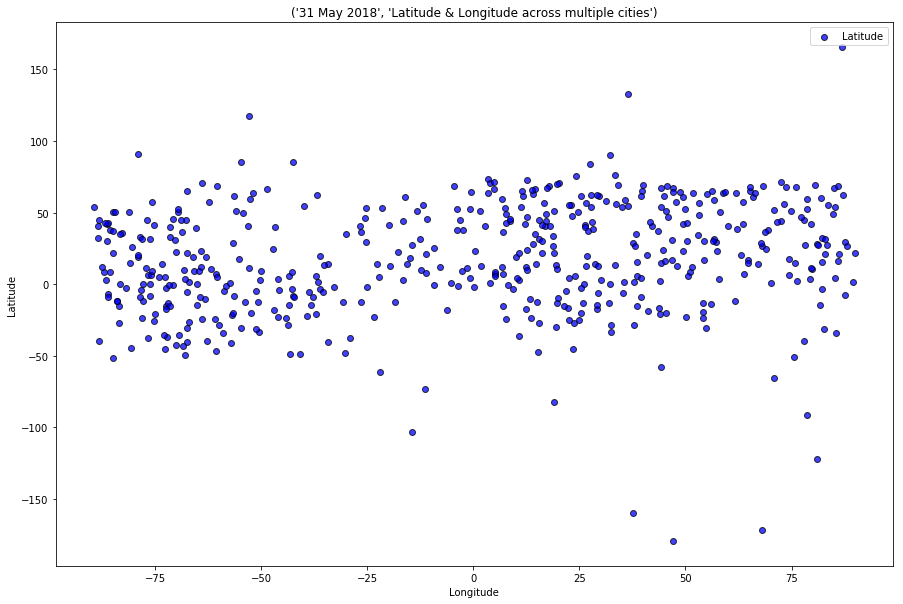

In [36]:
# Plot scatter plot with Longitude vs. Latitude to check city spread and save as .png

plt.figure(figsize=(15,10))
plt.scatter(cityname1["Longitude"], cityname1["Latitude"], marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.legend()
# plt.axvline(y=0, color='r', linestyle='-')
LatLonChartTitle = CurDate, "Latitude & Longitude across multiple cities"
plt.title(LatLonChartTitle)
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.savefig('LatLonChartTitle.png')